In [1]:
!git clone -b unet-gan https://github.com/hoangbros03/GAN-implement.git
%cd GAN-implement
%pip install -e .


Cloning into 'GAN-implement'...
remote: Enumerating objects: 20499, done.
remote: Counting objects: 100% (241/241), done.
remote: Compressing objects: 100% (140/140), done.
remote: Total 20499 (delta 112), reused 209 (delta 86), pack-reused 20258
Receiving objects: 100% (20499/20499), 545.30 MiB | 42.65 MiB/s, done.
Resolving deltas: 100% (113/113), done.


In [1]:
import os
# os.chdir('../src/cnn_gan')

In [2]:
# os.chdir('../pure_gan')
from pure_gan.mnist_dataloader import check_and_process_dataloader

In [3]:
# os.chdir('../cnn_gan')
from cnn_gan.train import Trainer

In [4]:
dataloader = check_and_process_dataloader("mnist", (1, 28, 28), 32)

The path 'mnist' exists.


In [5]:
import argparse
device = 'cuda'
# device=device, generator="mnist", discriminator="mnist", img_size=28, channel=1
args = argparse.Namespace(
        device="cuda",
        generator_type="mnist",
        discriminator_type="mnist",
        learning_rate=0.0001,
        channel=1,
        image_size=28,
        epochs=1,  # Set a different number of epochs for testing
        noise_size=100,
        batch_size=4,  # Set a different batch size for testing
        proportion=3,
        key=None
    )
trainer = Trainer(args)

trainer.train_loop(dataloader)

  0%|          | 0/1 [00:00<?, ?it/s]

torch.Size([4, 1, 28, 28])
torch.Size([4, 1, 28, 28])
torch.Size([4, 1, 28, 28])
torch.Size([4, 1, 28, 28])
torch.Size([4, 1, 28, 28])
torch.Size([4, 1, 28, 28])
torch.Size([4, 1, 28, 28])
torch.Size([4, 1, 28, 28])
torch.Size([4, 1, 28, 28])
torch.Size([4, 1, 28, 28])
torch.Size([4, 1, 28, 28])
torch.Size([4, 1, 28, 28])
torch.Size([4, 1, 28, 28])
torch.Size([4, 1, 28, 28])
torch.Size([4, 1, 28, 28])
torch.Size([4, 1, 28, 28])
torch.Size([4, 1, 28, 28])
torch.Size([4, 1, 28, 28])
torch.Size([4, 1, 28, 28])
torch.Size([4, 1, 28, 28])
torch.Size([4, 1, 28, 28])
torch.Size([4, 1, 28, 28])


  0%|          | 0/1 [00:15<?, ?it/s]


KeyboardInterrupt: 

torch.Size([32, 122, 3])


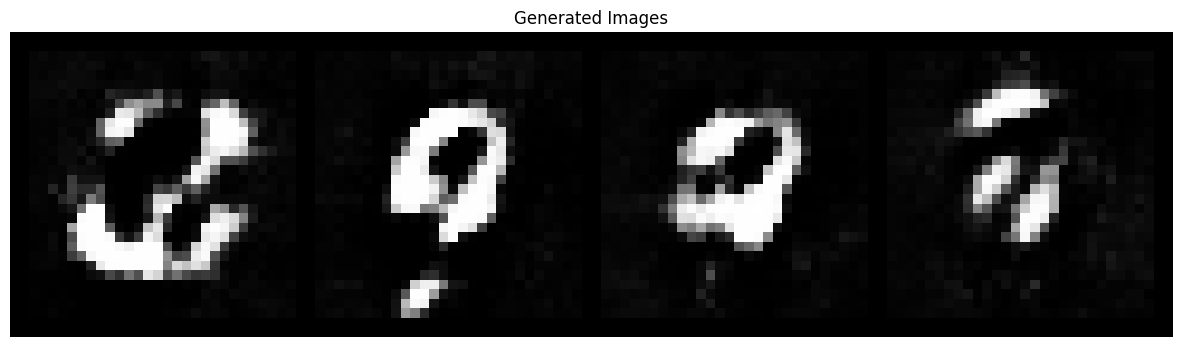

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision.utils as vutils

# Plot the fake images from the last epoch
plt.figure(figsize=(15, 15))
plt.axis("off")
plt.title("Generated Images")
print(np.transpose(trainer.img_list[-1],(1,2,0)).shape)
plt.imshow(np.transpose(trainer.img_list[-1],(1,2,0)))
plt.savefig('mnist')
plt.show()

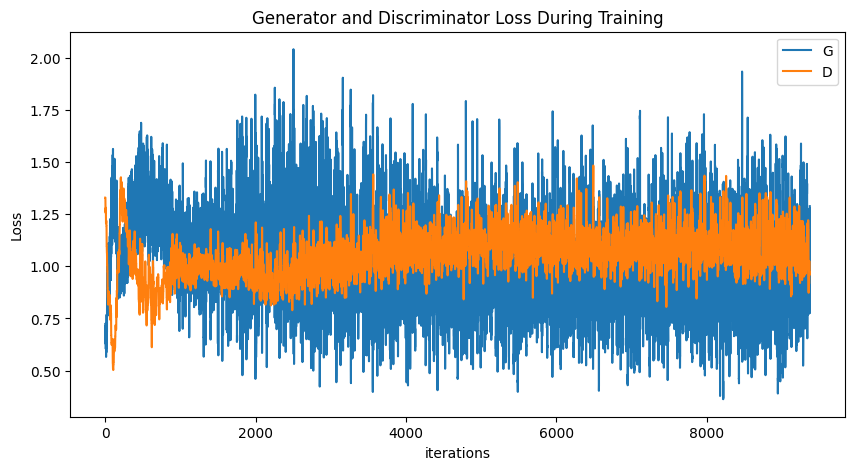

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(trainer.G_losses,label="G")
plt.plot(trainer.D_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()